# Figure 2: Map colored by surface mass load

### 1. Load packages

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from global_land_mask import globe
import scipy.stats as stats
import os
import importlib
import geopandas as gpd
# from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

# file containing functions:
import loadquakes
importlib.reload(loadquakes)

<module 'loadquakes' from '/home/bradlipovsky/notebooks/SLIQ/loadquakes.py'>

### 2. Load datasets

In [2]:
# GRACE data
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202201.GLO.RL06M.MSCNv02CRI.nc")
catalog = pd.read_csv('catalog.csv')
etas_declustered = pd.read_csv('etas_declustered.csv')
NND_declustered = pd.read_csv('NND_declustered.csv')

### 3. Plot the SLIQs from the full catalog with highest CP

In [3]:
sliq_full=catalog.sort_values('cp',ascending=False)
sliq_full=sliq_full.reset_index()
sliq_full=sliq_full.drop(['index'], axis=1)

sliq_full['dmass']=sliq_full['dmass'].astype(float)

<AxesSubplot:title={'center':'SLIQs with highest conditional probability (full catalog)'}, xlabel='Longitude', ylabel='Latitude'>

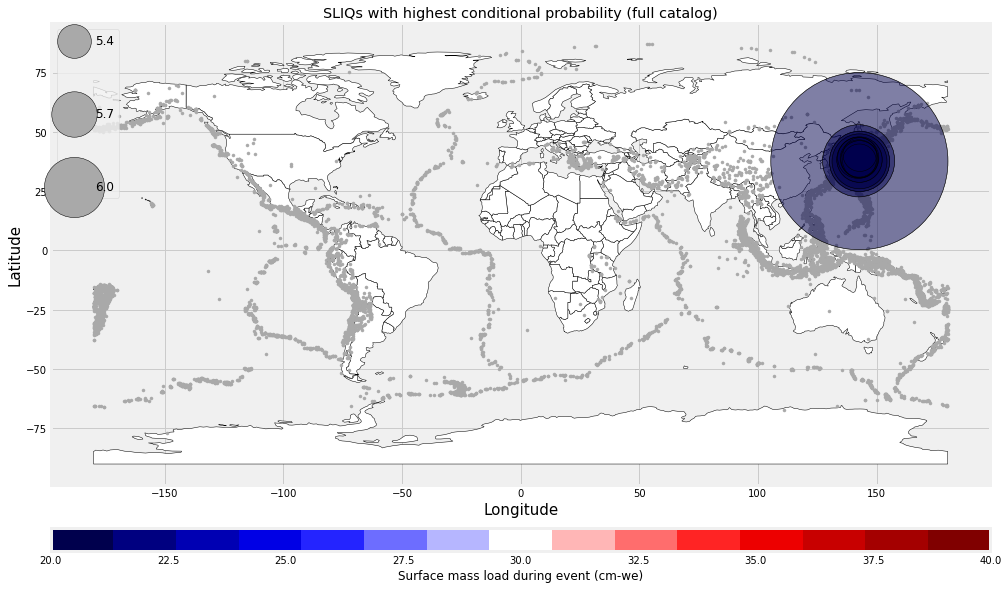

In [4]:
importlib.reload(loadquakes)
plt.style.use('fivethirtyeight')

loadquakes.load_map_cb(catalog,sliq_full.head(10),sliq_full.dmass.head(10), [1,8,6],
                'SLIQs with highest conditional probability (full catalog)',20,40,11)

### 4. Plot the 20 SLIQs from the ETAS declustered catalog with highest CP

In [5]:
sliq_nnd=NND_declustered.sort_values('cp',ascending=False)
sliq_nnd=sliq_nnd.reset_index()
sliq_nnd=sliq_nnd.drop(['index'], axis=1)


sliq_nnd['dmass']=sliq_nnd['dmass'].astype(float)

<AxesSubplot:title={'center':'SLIQs with highest conditional probability (NND)'}, xlabel='Longitude', ylabel='Latitude'>

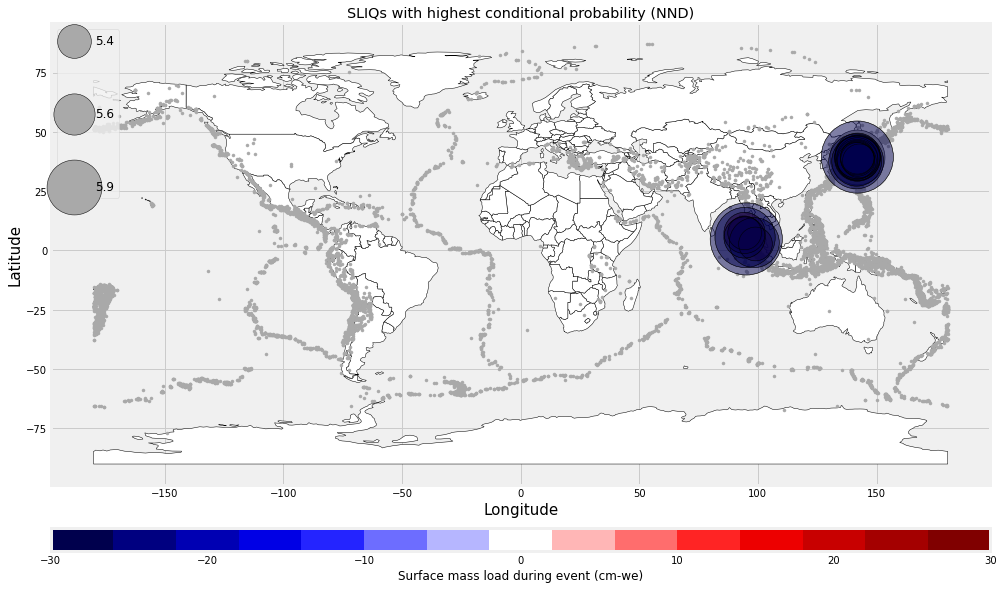

In [6]:
loadquakes.load_map_cb(catalog,sliq_nnd.head(20),sliq_nnd.dmass.head(20), [3,9,1],
                'SLIQs with highest conditional probability (NND)',-30,30,11)

### 5. Plot the 20 SLIQs from the ETAS declustered catalog with highest CP

In [7]:
sliq_etas=etas_declustered.sort_values('cp',ascending=False)
sliq_etas=sliq_etas.reset_index()
sliq_etas=sliq_etas.drop(['index'], axis=1)

sliq_etas['dmass']=sliq_etas['dmass'].astype(float)

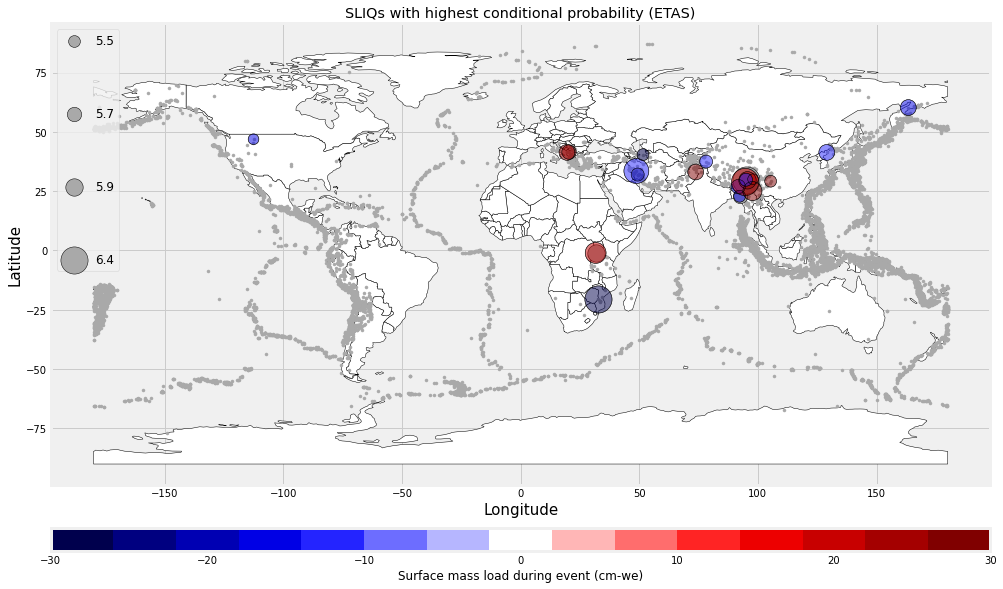

In [14]:
ax=loadquakes.load_map_cb(catalog,sliq_etas.head(20),sliq_etas.dmass.head(20), [1,2,3,5],
                'SLIQs with highest conditional probability (ETAS)',-30,30,11,circle_scale=1e-6)

(15.0, 35.0)

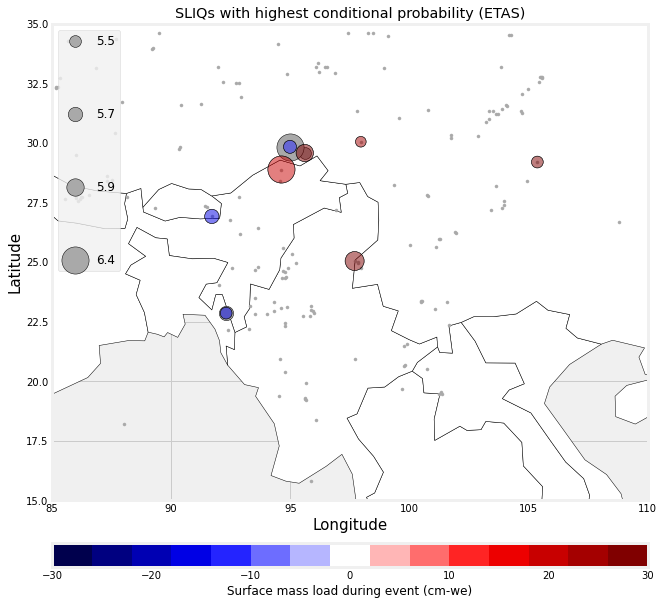

In [28]:
ax=loadquakes.load_map_cb(catalog,sliq_etas.head(20),sliq_etas.dmass.head(20), [1,2,3,5],
                'SLIQs with highest conditional probability (ETAS)',-30,30,11,circle_scale=1e-6)
ax.set_xlim([85,110])
ax.set_ylim([15,35])

In [26]:
sliq_etas.head(20)[(sliq_etas.head(20).latitude>20) & 
          (sliq_etas.head(20).latitude<40) & 
          (sliq_etas.head(20).longitude>90) & 
          (sliq_etas.head(20).longitude<110)]

,Unnamed: 0,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1,depth,dmass,cp
0,10466,10468,28.8810,94.6260,2005-06-01 20:06:41.450,5.8,POINT (28.881 94.626),5.4,0.0,6.907373e-11,0.796710,0.203290,1.0,25.80,31.352074,11.914214
1,11826,11828,29.5730,95.6050,2003-08-18 09:03:03.520,5.5,POINT (29.573 95.605),5.4,0.0,6.907373e-11,0.585476,0.414524,1.0,33.00,31.846877,11.914214
2,11862,11864,22.8540,92.3060,2003-07-26 23:18:17.960,5.7,POINT (22.854 92.306),5.4,0.0,6.907373e-11,0.891394,0.108606,1.0,10.00,31.683223,11.914214
5,2487,2489,29.8333,94.9838,2017-11-17 22:34:19.450,6.4,POINT (29.8333 94.9838),5.4,0.0,6.907373e-11,0.784964,0.215036,1.0,8.00,-34.524164,3.926561
8,209,211,29.1944,105.3650,2021-09-15 20:33:31.851,5.4,POINT (29.1944 105.365),5.4,0.0,6.907373e-11,0.890814,0.109186,1.0,7.12,24.034846,3.285261
10,10066,10068,26.9120,91.7050,2006-02-23 20:04:53.550,5.8,POINT (26.912 91.705),5.4,0.0,6.907373e-11,0.663857,0.336143,1.0,10.00,-15.574905,2.832101
11,4916,4918,30.0464,97.9565,2013-08-11 21:23:41.310,5.7,POINT (30.0464 97.95650000000001),5.4,0.0,6.907373e-11,0.832776,0.167224,1.0,6.00,-15.338487,2.832101
15,8332,8334,25.0390,97.6970,2008-08-21 12:24:30.930,6.0,POINT (25.039 97.697),5.4,0.0,6.907373e-11,0.853446,0.146554,1.0,10.00,27.661882,2.406558
